## Data Collection, Data Cleaning and EDA Project

### 1. Define Problem Statement 
#### Perform the price analysis of Air Conditioners available on Flipkart using Exploratory Data Analysis (EDA) to uncover
#### pricing trends, and feature-price relationships, providing meaningful insights for the decision-making.


In [914]:
# imoprting required Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re

### 2. Data Collection

#### Extracting Air Conditioners data from the Flipkart Website

In [917]:
brand=[]
model = []
price = []
power = []
room_size=[]
warranty=[]
ratings=[]
star = []
capacity=[]
for i in range(1,24):
    url = f"https://www.flipkart.com/search?q=air+conditioners&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_1_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_1_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=air+conditioners&requestId=c086e566-f495-457a-b438-18df47cfc4a1&as-searchtext=a&page={i}"
    
    request_header = {'Content-Type': 'text/html; charset=UTF-8','User-Agent': 'Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0','Accept-Encoding': 'gzip, deflate, br'}
    page = requests.get(url,headers = request_header)
    soup = BeautifulSoup(page.text)

     

    for i in soup.find_all("div",class_="tUxRFH"):  # container


        r = i.find("div",class_="XQDdHH")     #ratings
        if r:
            ratings.append(r.text)
        else:
            ratings.append(np.nan)


        pp = i.find("div",class_="Nx9bqj _4b5DiR") # price 
        if pp:
            price.append(pp.text)
        else:
            price.append(np.nan)

    
    for i in soup.find_all("div",class_="tUxRFH"): # container 
        text = i.text # only text

        t = i.find("div",class_="KzDlHZ")
        tt = t.text

        b = tt.split()[0]

        if b:
            brand.append(b)
        else:
            brand.append(np.nan)

        m = re.findall(r"\d+\sModel",text) # pattern for power
        if m:
            model.append(m[0])
        else:
            model.append(np.nan)

       
        c = re.findall(r"\d+\.?+\d?+\d?+\sTon",text) # pattern for power
        if c:
            capacity.append(c[0])
        else:
            capacity.append(np.nan)

       
        p = re.findall(r"(\d+\.+\d+)\sUnits|\d+\sUnits",text) # pattern for power
        if p:
            power.append(p[0])
        else:
            power.append(np.nan)

        w = re.findall(r"\d+\sYear|Years|year|years|months",text) # pattern for warranty
        if w:
            warranty.append(w[0])
        else:
            warranty.append(np.nan)

 
        s = re.findall(r"\d+\sStar",text) # pattern for warranty
        if s:
            star.append(s[0])
        else:
            star.append(np.nan)



    

dic = {"Brands":brand, "Model":model,"Capacity":capacity,"Annual Power Consumption":power,"Warranty":warranty,"Star Ratings":star,"Customer Rating":ratings,"Price":price}

#### Create a Data Frame 

In [919]:
data = pd.DataFrame(dic)

In [920]:
data

,Brands,Model,Capacity,Annual Power Consumption,Warranty,Star Ratings,Customer Rating,Price
0,Godrej,2024 Model,1.5 Ton,835.07,5 Year,4 Star,3.9,"₹32,990"
1,Panasonic,2025 Model,1.5 Ton,977.59,1 Year,3 Star,4,"₹35,990"
2,MarQ,NaN,1.5 Ton,781.88,1 Year,5 Star,4.1,"₹29,990"
3,Godrej,2024 Model,1.4 Ton,905.88,5 Year,3 Star,3.8,"₹28,990"
4,MarQ,NaN,1 Ton,684.9,1 Year,3 Star,4.1,"₹23,990"
...,...,...,...,...,...,...,...,...
259,Midea,2025 Model,2 Ton,1249.82,1 Year,3 Star,4.3,"₹41,990"
260,Blue,NaN,1 Ton,517.83,1 Year,5 Star,NaN,"₹37,790"
261,Blue,NaN,1 Ton,694.32,1 Year,3 Star,4.1,"₹35,870"
262,Sansui,2025 Model,1.5 Ton,NaN,1 Year,5 Star,4.2,"₹34,490"


In [921]:
data['Brands'] = data['Brands'].replace('Blue', 'Blue Star')

#### Export data into .csv format 

In [923]:
data.to_csv("AirConditionersFlipkart.csv")

#### Read CSV File 

In [925]:
df = pd.read_csv("AirConditionersFlipkart.csv", index_col=0)

### 3. Data Cleaning

In [927]:
# Converting the datatype to str
df["Model"] = df["Model"].astype(str)  
df["Capacity"] = df["Capacity"].astype(str)  
df["Warranty"] = df["Warranty"].astype(str)  
df["Star Ratings"] = df["Star Ratings"].astype(str)
df["Price"] = df["Price"].astype(str)  

In [928]:
df.dtypes

Brands                       object
Model                        object
Capacity                     object
Annual Power Consumption    float64
Warranty                     object
Star Ratings                 object
Customer Rating             float64
Price                        object
dtype: object

In [929]:
# Removing the unwanted characters and words from the data
df['Model'] = df['Model'].str.replace(r"\s*Model", "", regex=True)
df['Capacity'] = df['Capacity'].str.replace(r"\s*Ton", "", regex=True)
df['Warranty'] = df['Warranty'].str.replace(r'\b(Year|Years|year|years|months)\b', '',regex=True)
df['Star Ratings'] = df['Star Ratings'].str.replace(r"\s*Star", "", regex=True)
df['Price'] = df['Price'].str.replace(r'[₹ ,]', '', regex=True)

In [930]:
df

,Brands,Model,Capacity,Annual Power Consumption,Warranty,Star Ratings,Customer Rating,Price
0,Godrej,2024,1.5,835.07,5,4,3.9,32990
1,Panasonic,2025,1.5,977.59,1,3,4.0,35990
2,MarQ,nan,1.5,781.88,1,5,4.1,29990
3,Godrej,2024,1.4,905.88,5,3,3.8,28990
4,MarQ,nan,1,684.90,1,3,4.1,23990
...,...,...,...,...,...,...,...,...
259,Midea,2025,2,1249.82,1,3,4.3,41990
260,Blue Star,nan,1,517.83,1,5,NaN,37790
261,Blue Star,nan,1,694.32,1,3,4.1,35870
262,Sansui,2025,1.5,NaN,1,5,4.2,34490


In [931]:
# Converting the datatype to str
df["Model"] = pd.to_numeric(df["Model"], errors='coerce') 
df["Capacity"] = pd.to_numeric(df["Capacity"], errors='coerce')  
df["Warranty"] = pd.to_numeric(df["Warranty"], errors='coerce')  
df["Star Ratings"] = pd.to_numeric(df["Star Ratings"], errors='coerce')  
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')

In [932]:
df.dtypes

Brands                       object
Model                       float64
Capacity                    float64
Annual Power Consumption    float64
Warranty                    float64
Star Ratings                float64
Customer Rating             float64
Price                         int64
dtype: object

In [933]:
df.head()

,Brands,Model,Capacity,Annual Power Consumption,Warranty,Star Ratings,Customer Rating,Price
0,Godrej,2024.0,1.5,835.07,5.0,4.0,3.9,32990
1,Panasonic,2025.0,1.5,977.59,1.0,3.0,4.0,35990
2,MarQ,NaN,1.5,781.88,1.0,5.0,4.1,29990
3,Godrej,2024.0,1.4,905.88,5.0,3.0,3.8,28990
4,MarQ,NaN,1.0,684.90,1.0,3.0,4.1,23990


In [934]:
df.tail()

,Brands,Model,Capacity,Annual Power Consumption,Warranty,Star Ratings,Customer Rating,Price
259,Midea,2025.0,2.0,1249.82,1.0,3.0,4.3,41990
260,Blue Star,NaN,1.0,517.83,1.0,5.0,NaN,37790
261,Blue Star,NaN,1.0,694.32,1.0,3.0,4.1,35870
262,Sansui,2025.0,1.5,NaN,1.0,5.0,4.2,34490
263,CARRIER,2024.0,1.5,754.05,1.0,5.0,4.0,39990


In [935]:
df.columns

Index(['Brands', 'Model', 'Capacity', 'Annual Power Consumption', 'Warranty',
       'Star Ratings', 'Customer Rating', 'Price'],
      dtype='object')

In [936]:
df.shape

(264, 8)

In [937]:
df.Brands.value_counts()

Brands
Panasonic     46
Godrej        35
Midea         34
Blue Star     26
CARRIER       14
Hitachi       13
Daikin        12
Sansui        11
Lloyd         11
Voltas        10
LG            10
Haier          9
SAMSUNG        6
MarQ           5
IFB            4
realme         4
Whirlpool      4
ONIDA          3
O-General      3
TCL            1
Mitsubishi     1
Kelvinator     1
Sharp          1
Name: count, dtype: int64

In [938]:
df.isnull().sum()

Brands                       0
Model                       68
Capacity                     1
Annual Power Consumption    40
Warranty                    22
Star Ratings                 4
Customer Rating              8
Price                        0
dtype: int64

In [939]:
df['Model'] = df['Model'].fillna(df['Model'].mode()[0])
df['Capacity'] = df['Capacity'].fillna(df['Capacity'].mode()[0])
df['Warranty'] = df['Warranty'].fillna(df['Warranty'].mode()[0])
df['Annual Power Consumption'] = df['Annual Power Consumption'].fillna(df['Annual Power Consumption'].mean())
df['Star Ratings'] = df['Star Ratings'].fillna(df['Star Ratings'].mode()[0])
df['Customer Rating'] = df['Customer Rating'].fillna(df['Customer Rating'].mean())
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [940]:
df.isnull().sum()

Brands                      0
Model                       0
Capacity                    0
Annual Power Consumption    0
Warranty                    0
Star Ratings                0
Customer Rating             0
Price                       0
dtype: int64

In [941]:
df.describe(include=[np.number])

,Model,Capacity,Annual Power Consumption,Warranty,Star Ratings,Customer Rating,Price
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,2024.617424,1.440720,872.102991,1.655303,3.640152,4.071094,37976.268939
std,0.617735,0.383028,206.654054,1.748038,0.903761,0.227619,9158.311509
min,2023.000000,0.750000,418.520000,1.000000,2.000000,2.200000,20990.000000
25%,2024.000000,1.000000,699.460000,1.000000,3.000000,4.000000,32990.000000
50%,2025.000000,1.500000,872.102991,1.000000,3.000000,4.100000,35990.000000
75%,2025.000000,1.500000,986.720000,1.000000,5.000000,4.200000,40546.750000
max,2025.000000,2.600000,1476.470000,10.000000,5.000000,5.000000,95990.000000


### 4. Data Analysis and Visualization (EDA)

#### Using a bar plot to compare Prices by Brand vise

C:\Users\Admin\AppData\Local\Temp\ipykernel_14696\3277905474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Brands", y="Price", data=df, palette="coolwarm")


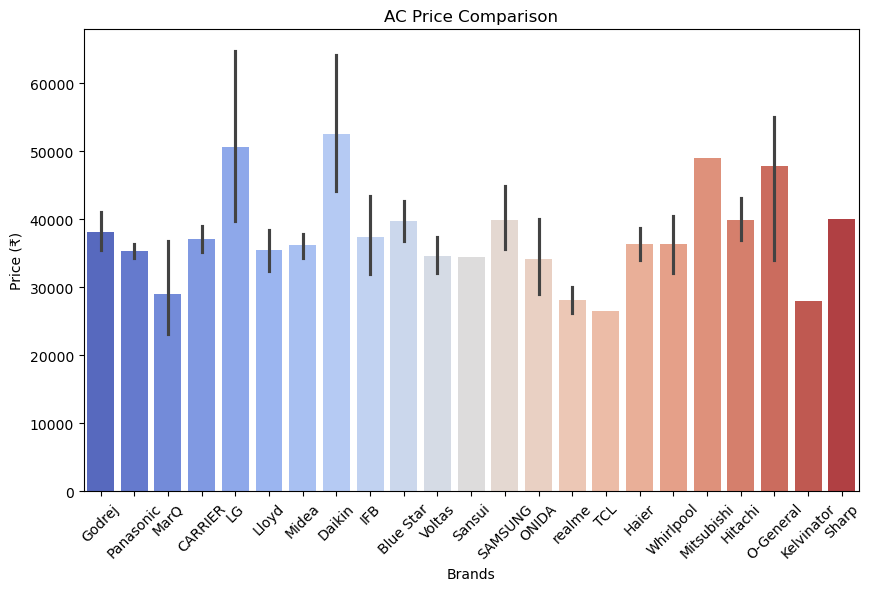

In [944]:
# barplot
plt.figure(figsize=(10, 6))
sns.barplot(x="Brands", y="Price", data=df, palette="coolwarm")
plt.title("AC Price Comparison")
plt.ylabel("Price (₹)")
plt.xticks(rotation=45)
plt.show()

#### Visualizing Price Distribution
Using a box plot and a histogram to understand price spread and outliers.

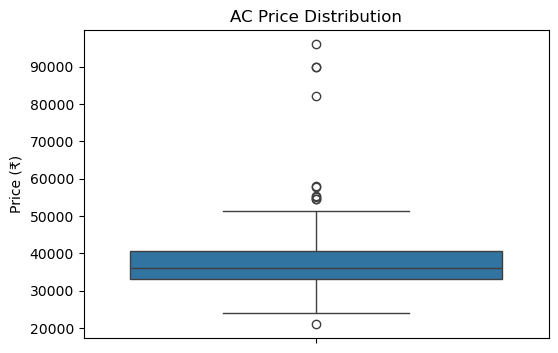

In [946]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(df["Price"])
plt.title("AC Price Distribution")
plt.ylabel("Price (₹)")
plt.show()

- The interquartile range (IQR) suggests that the majority of ACs are priced within the range ₹30,000 to ₹40,000.
- The line inside the box represents the median price, showing that half of the ACs cost less than ₹35,000, and half cost more.
- There is some spread, but prices are relatively clustered, hence we can say Price Variability is Moderate.
- Several ACs are priced above ₹60,000, with some reaching up to ₹90,000.
- These outliers suggest that premium models exist but are less common.

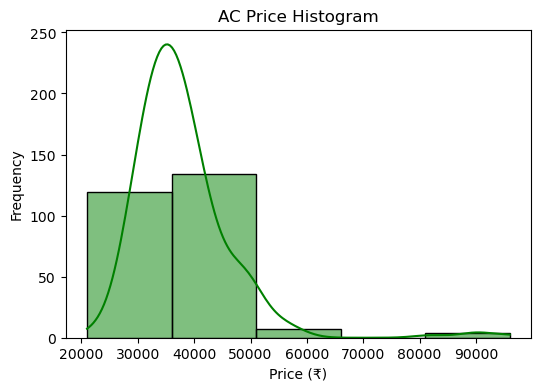

In [948]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(df["Price"], bins=5, kde=True, color="green")
plt.title("AC Price Histogram")
plt.xlabel("Price (₹)")
plt.ylabel("Frequency")
plt.show()

- The highest frequency of AC prices falls between ₹35,000 and ₹40,000, indicating that most models are priced within this range.
- The right-skewed distribution, shows that there are few air conditioners priced above ₹50,000.

In [950]:
df.set_index("Brands", inplace=True)  # Set brand as index

#### Use heatmap to visualize relationships between price and multiple features.

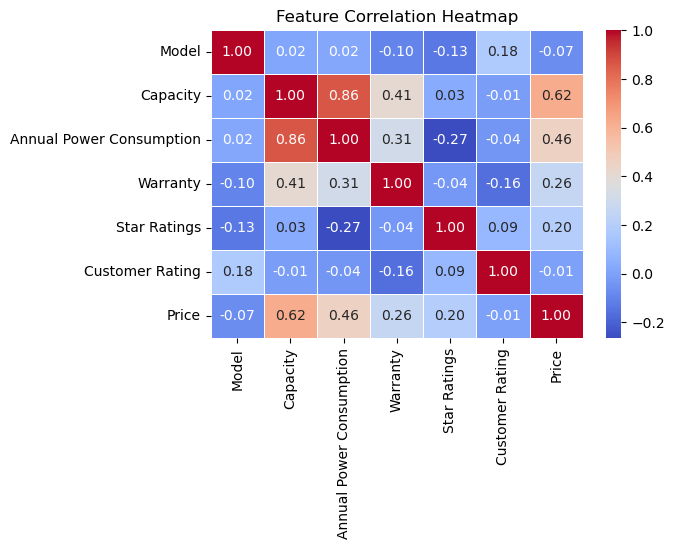

In [952]:
# Generate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

- Larger capacity Air Conditioners (like 1.5 or 2 tons) are generally more expensive.

- Higher Star-rated Air Conditioners are generally more expensive.

### Conclusions :
1. Prices of Air Conditioners are affected by several features like Capacity, Star Ratings, etc.
2. The majority of Air Conditioners are priced within the range ₹30,000 to ₹40,000.
3. Prices of Air Conditioners generally doesn't depends on the Warranty and Customer Ratings.